# Modele generatywne w zastosowaniach obrazu 2D i 3D

### Plan opracowania
1. Wprowadzenie do modeli generatywnych
2. Zadanie generowania i dogenerowywania fragmentów obrazów
3. Modele generatywne w grafice 2D

![Whale](images/whale.webp) 
![kitten](images/kitten.webp)
![face](images/face.webp)
![doggo](images/doggo.webp)

## Modele Generatywne

### Definicja
> Generative AI models can take inputs such as text, image, audio, video, and code and generate new content into any of the modalities mentioned. \
> For example, it can turn text inputs into an image, turn an image into a song, or turn video into text. \
> -- <cite>[Nvidia](https://www.nvidia.com/en-us/glossary/generative-ai/#:~:text=Generative%20AI%20models%20can%20take,or%20turn%20video%20into%20text.)</cite>

Modele generatywne to rodzaj algorytmów uczenia maszynowego, które uczą się generować nowe dane na wzór danych treningowych. \
W przeciwieństwie do modeli dyskryminacyjnych, które klasyfikują lub przewidują wartości, modele generatywne są zaprojektowane do tworzenia nowych przykładów.

### Rodzaje modeli generatywnych
#### Generative Adversarial Networks (GANs) (2)

Modele te składają się z dwóch sieci neuronowych:
- Generator: Tworzy nowe dane.
- Dyskryminator: Rozróżnia dane prawdziwe (z danych treningowych) od wygenerowanych (przez generator).

Trening GAN polega na „grze” między generatorem i dyskryminatorem:
- Celem generatora jest wyprodukowanie danych, które są trudne do odróżnienia od prawdziwych.
- Celem dyskryminatora jest rozróżnienie prawdziwych danych od wygenerowanych.

Po odpowiednim treningu generator produkuje dane, które są trudne do odróżnienia od prawdziwych.

#### Variational Autoencoders (VAEs) (3,4)
VAE są modelami generatywnymi wykorzystywanymi do generowania nowych danych w formie wariacji danych wejściowych, na których zostały wytrenowane.


VAE składają się z dwóch sieci neuronowych:
- Encoder: Mapuje dane wejściowe na przestrzeń latentną.
- Decoder: Mapuje dane z przestrzeni latentnej na dane wyjściowe.


#### Modele dyfuzyjne (5)
Modele dyfuzyjne to generatywne modele, które uczą się odtwarzać dane, odwracając proces stopniowego dodawania szumu do danych (proces dyfuzji).

Proces uczenia modelu dyfuzyjnego składa się z dwóch etapów:
- Proces do przodu: Stopniowe dodawanie szumu do danych aż do ich pełnego zaszumienia (losowy szum).
- Proces odwrotny: Odszumianie krok po kroku przy użyciu modelu (np. UNet), aby odzyskać pierwotne dane.

Model jest trenowany na rzeczywistych danych, optymalizując różnicę między zaszumionymi danymi a ich rekonstrukcją - uczy się przewidywać rozkład danych na każdym etapie procesu.

#### Transformery wizualne (Vision Transformers, ViTs)
Modele te przenoszą ideę architektury Transformer, pierwotnie stworzonej dla danych tekstowych, na dane obrazowe. Dzięki podziałowi obrazów na małe fragmenty (tzw. patche), transformery uczą się relacji między fragmentami.

Przykłady:
- Imagen (Google): Wykorzystuje transformery do generacji obrazów na podstawie opisu tekstowego.
- DALL·E: Integruje transformery w zadania generatywne, łącząc tekst z obrazami.

#### Flow-based Models (Modele przepływowe)
Modele te uczą się rozkładów danych poprzez transformację przestrzeni wejściowej do rozkładów prostszych (np. rozkład normalny). Transformacje są odwracalne, dzięki czemu modele mogą zarówno analizować, jak i generować dane.

Przykłady:
- RealNVP: Jeden z pierwszych modeli przepływowych generujących realistyczne obrazy.
- Glow: Umożliwia generację obrazów i ich manipulację w przestrzeni latentnej.


## Zadanie generowania i dogenerowywania obszarów

### Image inpainting

![Inpainting](images/inpainting_02.png)

Image inpainting to technika w obszarze przetwarzania obrazów, której celem jest uzupełnianie brakujących fragmentów obrazu lub usuwanie niepożądanych elementów w sposób, który jest wizualnie spójny z otoczeniem.

Proces inpaintingu opiera się na analizie dostępnych informacji w obrazie (np. kolorów, tekstur, krawędzi) i ich wykorzystaniu do uzupełnienia brakujących obszarów.

#### Przykłady zastosowań inpaintingu:
- Usuwanie obiektów z obrazu.
- Uzupełnianie brakujących fragmentów obrazu.
- Usuwanie zniekształceń w obrazie.
- Usuwanie znaków wodnych lub innych elementów zakrywających obraz.

#### Podstawowe kroki inpaintingu:
1. Zidentyfikowanie brakujących obszarów: Oznaczenie fragmentów obrazu, które wymagają rekonstrukcji (np. maskowanie uszkodzonych miejsc).
2. Analiza kontekstu: Algorytm bada otaczające obszary w celu zrozumienia wzorców, które mają zostać uzupełnione.
3. Uzupełnianie braków: Wykorzystanie technik interpolacji, kopiowania pikseli, syntezy tekstur lub generatywnego modelowania, aby uzupełnić brakujące miejsca.


#### Klasyczne metody inpaintingu:
Interpolacja pikseli: Najprostsze metody polegają na interpolacji brakujących pikseli na podstawie ich otoczenia.
- Interpolacja liniowa lub bilinearna: Wykorzystuje wartości sąsiednich pikseli, aby oszacować brakujące wartości.
- Interpolacja splajnami: Bardziej zaawansowana metoda, która wygładza przejścia między brakującymi i istniejącymi pikselami.

Metody propagacji tekstur:
- Algorytmy propagują teksturę i kolory z otaczającego obszaru do brakującego regionu.
- Metoda Naviera-Stokesa: Rozwiązuje równania przepływu cieczy do propagacji wartości pikseli.

In [ ]:
%pip install numpy opencv-python matplotlib

*Import niezbędnych bibliotek*

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

*Definicja funkcji do prezentacji wyników inpaintingu*

In [2]:
def display_inpainted_images(original, mask, result):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 4, 1)
    plt.title("Oryginalny obraz")
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title("Maska")
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title("Obraz z maską")
    masked = original.copy()
    masked[mask == 255] = [255, 255, 255]
    plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title("Odtworzony obraz")
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()


In [3]:
def ordinary_inpainting(original, mask):
    return cv2.inpaint(original, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

In [4]:
original_image = cv2.imread('images/inpainting.jpg')

image_center = (original_image.shape[1] // 2, original_image.shape[0] // 2)
mask_size = (original_image.shape[1] // 4, original_image.shape[0] // 4)

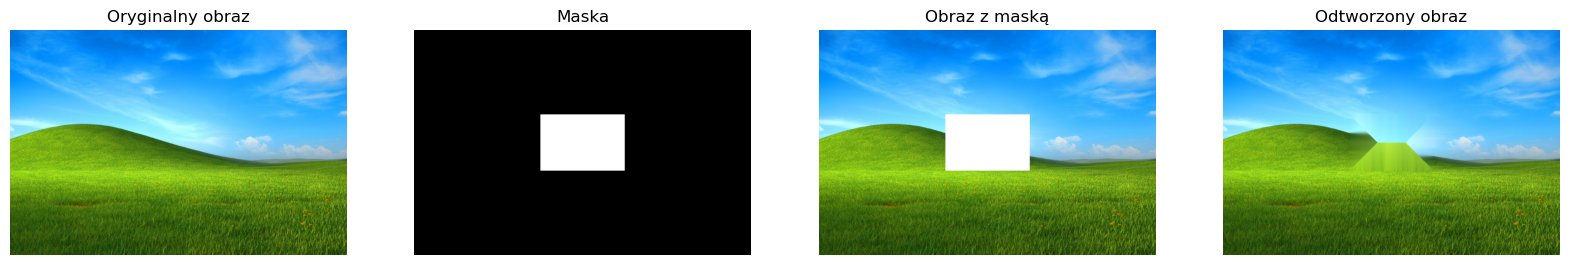

In [5]:
big_rectangle_mask_in_the_middle = np.zeros(original_image.shape[:2], dtype=np.uint8)
cv2.rectangle(big_rectangle_mask_in_the_middle, (image_center[0] - mask_size[0] // 2, image_center[1] - mask_size[1] // 2),
              (image_center[0] + mask_size[0] // 2, image_center[1] + mask_size[1] // 2), 255, -1)

inpaint = ordinary_inpainting(original_image, big_rectangle_mask_in_the_middle)
display_inpainted_images(original_image, big_rectangle_mask_in_the_middle, inpaint)

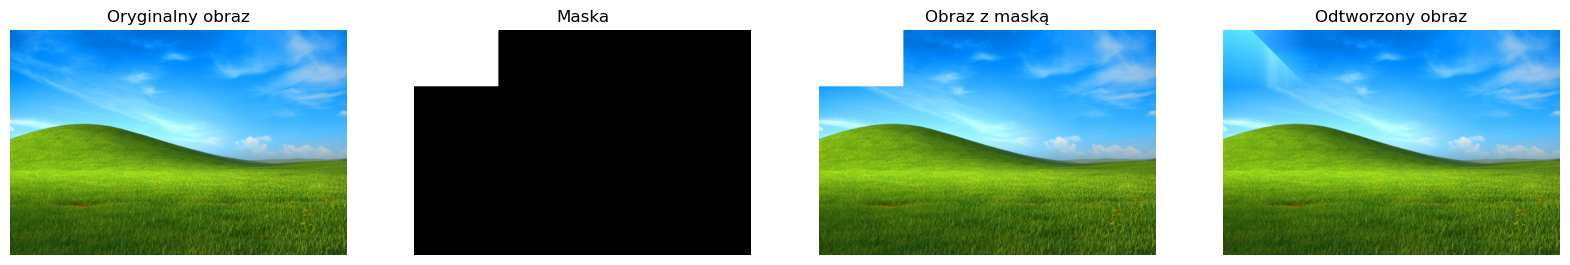

In [6]:
big_rectangle_mask_to_the_left = np.zeros(original_image.shape[:2], dtype=np.uint8)
cv2.rectangle(big_rectangle_mask_to_the_left, (0, 0), (mask_size[0], mask_size[1]), 255, -1)

inpaint = ordinary_inpainting(original_image, big_rectangle_mask_to_the_left)
display_inpainted_images(original_image, big_rectangle_mask_to_the_left, inpaint)

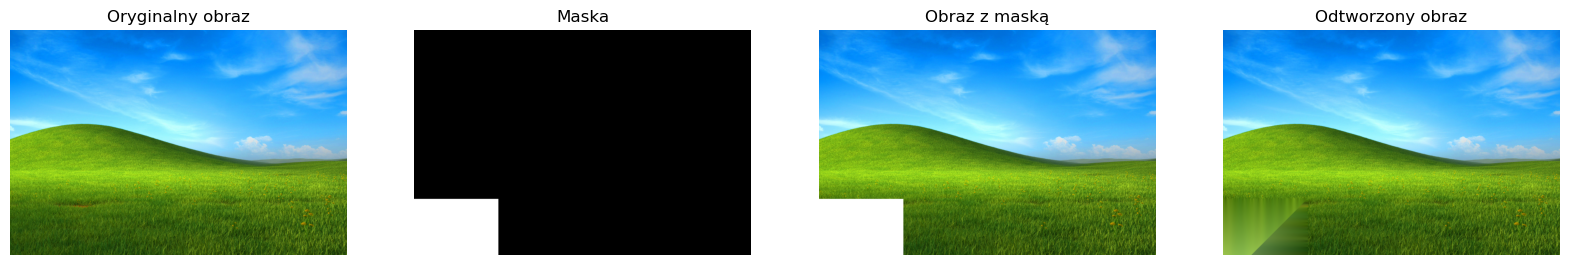

In [7]:
big_rectangle_mask_in_the_corner = np.zeros(original_image.shape[:2], dtype=np.uint8)
cv2.rectangle(big_rectangle_mask_in_the_corner, (0, original_image.shape[0] - mask_size[1]), 
                (mask_size[0], original_image.shape[0]), 255, -1)

inpaint = ordinary_inpainting(original_image, big_rectangle_mask_in_the_corner)
display_inpainted_images(original_image, big_rectangle_mask_in_the_corner, inpaint)

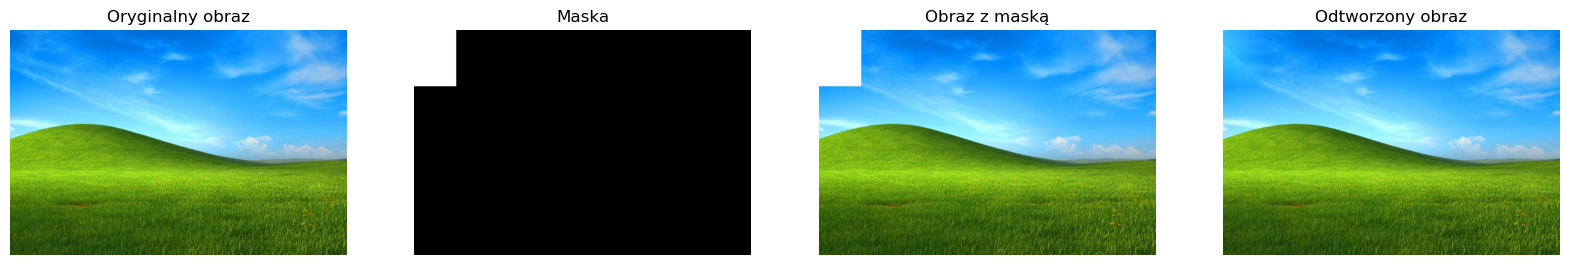

In [8]:
small_rectangle_mask_on_the_side = np.zeros(original_image.shape[:2], dtype=np.uint8)
cv2.rectangle(small_rectangle_mask_on_the_side, (0, 0), (mask_size[0] // 2, mask_size[1]), 255, -1)

inpaint = ordinary_inpainting(original_image, small_rectangle_mask_on_the_side)
display_inpainted_images(original_image, small_rectangle_mask_on_the_side, inpaint)

### Zadanie 1. (Obowiązkowe): Implementacja prostego algorytmu inpaintingu
Twoim zadaniem jest zaimplementowanie własnego, prostego algorytmu do rekonstrukcji brakujących fragmentów obrazu. 
W tym ćwiczeniu skoncentrujesz się na uzupełnianiu brakujących obszarów przy użyciu techniki interpolacji sąsiadujących pikseli.

Szczegóły:
1. Wczytaj obraz oraz maskę wskazującą brakujące obszary.
2. Zaimplementuj prosty algorytm inpaintingu:
3. Dla każdego piksela w brakującym obszarze (oznaczonym przez maskę):
4. Zamień wartość piksela na średnią wartość jego sąsiednich pikseli, które nie są częścią maski.
5. Wyświetl wynik na podstawie wypełnionych braków.

Kod początkowy:

In [62]:
def simple_inpaint(image, mask):
    """
    Prosty algorytm inpaintingu: zastąp brakujące piksele średnią sąsiednich pikseli.
    """

    ### Miejsce na Twój kod
    pass

In [ ]:
simple_inpainting = simple_inpaint(original_image, big_rectangle_mask_in_the_middle)
display_inpainted_images(original_image, big_rectangle_mask_in_the_middle, simple_inpainting)

## Inpainting z wykorzystaniem modeli generatywnych

W celu uzyskania bardziej zaawansowanych rezultatów w inpaintingu, można wykorzystać modele generatywne, które uczą się generować nowe, spójne z otoczeniem fragmenty obrazu.

#### Jak działa inpainting z wykorzystaniem modeli generatywnych?
- Użytkownik dostarcza obraz z oznaczonymi brakującymi fragmentami (np. maską, która wskazuje obszary do uzupełnienia).
- Model analizuje kontekst (otaczające piksele, strukturę i teksturę obrazu) w celu przewidzenia brakujących informacji.

Wynikiem jest obraz, w którym brakujące obszary zostały wypełnione w sposób wizualnie spójny.

In [ ]:
%pip install diffusers transformers 

In [ ]:
from diffusers import StableDiffusionInpaintPipeline
import torch
from PIL import Image
from diffusers.pipelines.stable_diffusion import safety_checker

# Załaduj pretrenowany model
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting", 
    torch_dtype=torch.float16
).to("cuda")

# Trick wyłączający sprawdzanie bezpieczeństwa
def sc(self, clip_input, images) : return images, [False for i in images]
safety_checker.StableDiffusionSafetyChecker.forward = sc


# Załaduj obraz i maskę
image = Image.open("images/inpainting_05.png").convert("RGB")
mask = Image.open("images/inpainting_05_mask.png").convert("RGB")  # Czarny: obszar do wypełnienia

# Wypełnianie brakującego obszaru
result = pipe(prompt="Face of a yellow cat, high resolution, sitting on a park bench", image=image, mask_image=mask).images[0]

# Zapis lub wyświetlenie wyniku
result.save("images/inpainted_image.jpg")
result.show()

### Wykorzystanie GAN-ów do inpaintingu

#### Podstawy działania GAN-ów

![GANs](./images/gan_diagram.svg)
Źródło: [Google Developers](https://developers.google.com/machine-learning/gan/gan_structure?hl=pl)

##### Struktura GAN-ów
**Generator** - Tworzy sztuczne próbki (np. obrazy) na podstawie losowego szumu.

 Jego celem jest wygenerowanie obrazów, będących jak najbardziej zbliżonymi do prawdziwych danych treningowych.

**Dyskryminator** - Ocenia, czy dany obraz jest "prawdziwy" (pochodzi z rzeczywistego zbioru danych), czy "fałszywy" (wygenerowany przez generator).

##### Poces rywalizacji (Adversarial Training)
1. Generator tworzy próbki.
2. Dyskryminator analizuje próbki i przypisuje im prawdopodobieństwo bycia prawdziwymi.
3. Obie sieci uczą się równocześnie:
    - Generator stara się oszukać dyskryminator, tworząc coraz bardziej realistyczne obrazy.
    - Dyskryminator stara się poprawnie klasyfikować obrazy jako prawdziwe lub fałszywe.
4. Proces powtarza się iteracyjnie, aż generator zacznie tworzyć obrazy tak realistyczne, że dyskryminator nie będzie w stanie ich rozróżnić od prawdziwych.

##### Funkcja kosztu

Funkcja kosztu GAN-ów składa się z dwóch składowych:

1. **Funkcja kosztu Dyskryminatora**:
Dyskryminator stara się maksymalizować prawdopodobieństwo poprawnej klasyfikacji danych:
    - Prawdziwe próbki: Przypisuje im wysokie prawdopodobieństwo ($D(x)$ bliskie 1).
    - Fałszywe próbki: Przypisuje im niskie prawdopodobieństwo ($D(G(z))$ bliskie 0).

$$\mathcal{L}_D = -\mathbb{E}_{x \sim p_{data}} [\log D(x)] - \mathbb{E}_{z \sim p_z} [\log (1 - D(G(z)))]$$


2. **Funkcja kosztu Generatora**:
Generator stara się oszukać dyskryminator, czyli sprawić, by wygenerowane próbki zostały uznane za prawdziwe. Oznacza to, że generator chce maksymalizować prawdopodobieństwo, że $D(G(z))$ będzie bliskie 1.

$$\mathcal{L}_G = -\mathbb{E}_{z \sim p_z} [\log D(G(z))]$$

##### Wykorzystanie GAN-ów w inpaintingu
1. Wejście:
    - Uszkodzony obraz, gdzie niektóre piksele są zablokowane (np. zamalowane na czarno).
    - Regiony te są traktowane jako "puste miejsca", które trzeba uzupełnić.
2. Proces uczenia:
    - Generator próbuje przewidzieć brakujące fragmenty na podstawie kontekstu (sąsiadujących pikseli).
    - Dyskryminator ocenia cały obraz (lub tylko wypełniony fragment), próbując stwierdzić, czy jest on realistyczny i spójny.
    - Generator uczy się wytwarzać brakujące części tak, by pasowały do reszty obrazu.

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import save_image
from tqdm import tqdm

In [66]:
class MaskedFashionMNIST(torch.utils.data.Dataset):
    def __init__(self, train=True):
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])
        self.dataset = datasets.FashionMNIST(root="./data", train=train, download=True, transform=transform)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img, _ = self.dataset[idx]
        mask = torch.ones_like(img)
        
        size = np.random.randint(10, 14)
        x, y = np.random.randint(0, 28 - size, size=2)
        
        mask[:, x:x+size, y:y+size] = 0
        masked_img = img * mask
        
        return masked_img, img, mask

In [98]:
def show_gan_test_images(model, dataloader, device):
    model.eval()
    with torch.no_grad():
        for masked_images, images, masks in dataloader:
            images, masked_images, masks = images.to(device), masked_images.to(device), masks.to(device)
            fake_images = model(masked_images, masks)

            plt.figure(figsize=(20, 7))
            for j in range(10):
                plt.subplot(3, 10, j + 1)
                plt.imshow(masked_images[j].cpu().numpy().transpose(1, 2, 0).squeeze(), cmap='gray')
                plt.axis('off')

                plt.subplot(3, 10, j + 11)
                plt.imshow(fake_images[j].cpu().numpy().transpose(1, 2, 0).squeeze(), cmap='gray')
                plt.axis('off')

                plt.subplot(3, 10, j + 21)
                plt.imshow(images[j].cpu().numpy().transpose(1, 2, 0).squeeze(), cmap='gray')
                plt.axis('off')

            plt.show()

            break

In [68]:
class GeneratorInpaint(nn.Module):
    def __init__(self):
        super(GeneratorInpaint, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(2, 64, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 1, 3, stride=1, padding=1),
            nn.Tanh()
        )
    
    def forward(self, masked_image, mask):
        x = torch.cat((masked_image, mask), dim=1)
        return self.model(x)

In [69]:
class DiscriminatorInpaint(nn.Module):
    def __init__(self):
        super(DiscriminatorInpaint, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, 3, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img)

In [70]:
def save_model(generator, discriminator, path):
    torch.save(generator.state_dict(), f"{path}/generator.pth")
    torch.save(discriminator.state_dict(), f"{path}/discriminator.pth")

In [71]:
def train_inpainting_gan(generator, optimizer_G, discriminator, optimizer_D, criterion, criterion_recon, dataloader, epochs, device):
    training_progress = tqdm(range(epochs))

    for epoch in training_progress:
        for masked_images, images, masks in dataloader:
            images, masked_images, masks = images.to(device), masked_images.to(device), masks.to(device)
            
            real_labels = torch.ones(images.size(0), 1).to(device)
            fake_labels = torch.zeros(images.size(0), 1).to(device)

            # Trening Dyskryminatora
            optimizer_D.zero_grad()
            outputs_real = discriminator(images)
            d_loss_real = criterion(outputs_real, real_labels)
            
            fake_images = generator(masked_images, masks)
            outputs_fake = discriminator(fake_images.detach())
            d_loss_fake = criterion(outputs_fake, fake_labels)
            
            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            optimizer_D.step()

            # Trening Generatora
            optimizer_G.zero_grad()
            fake_images = generator(masked_images, masks)
            outputs = discriminator(fake_images)
            g_loss_gan = criterion(outputs, real_labels)
            g_loss_recon = criterion_recon(fake_images, images)
            g_loss = g_loss_gan + 10 * g_loss_recon
            g_loss.backward()
            optimizer_G.step()

        training_progress.set_description(f"Loss D: {d_loss.item():.4f}, Loss G: {g_loss.item():.4f}")

        save_image(masked_images, f"images/inpainted/gan/masked_epoch_{epoch}.png", nrow=8, normalize=True)
        save_image(fake_images, f"images/inpainted/gan/fake_epoch_{epoch}.png", nrow=8, normalize=True)
        save_image(images, f"images/inpainted/gan/original_epoch_{epoch}.png", nrow=8, normalize=True)

    save_image(masked_images, f"images/inpainted/gan/masked_final.png", nrow=8, normalize=True)
    save_image(fake_images, f"images/inpainted/gan/fake_final.png", nrow=8, normalize=True)
    save_image(images, f"images/inpainted/gan/original_final.png", nrow=8, normalize=True)

    save_model(generator, discriminator, "models/saved/inpainting_gan")

    print("Trening zakończony!")

In [72]:
epochs = 30
lr = 0.0002
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

generator_inpaint = GeneratorInpaint().to(device)
discriminator_inpaint = DiscriminatorInpaint().to(device)

criterion = nn.BCELoss()
criterion_recon = nn.L1Loss()

optimizer_G = optim.Adam(generator_inpaint.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator_inpaint.parameters(), lr=lr)

In [73]:
batch_size = 64

train_loader = torch.utils.data.DataLoader(MaskedFashionMNIST(train=True), batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(MaskedFashionMNIST(train=False), batch_size=batch_size, shuffle=False)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataloader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./data', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True
)

In [ ]:
train_inpainting_gan(generator_inpaint, optimizer_G, discriminator_inpaint, optimizer_D, criterion, criterion_recon, train_loader, epochs, device)

C:\Users\micha\AppData\Local\Temp\ipykernel_36836\3444800330.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator_inpaint.load_state_dict(torch.load("models/saved/i

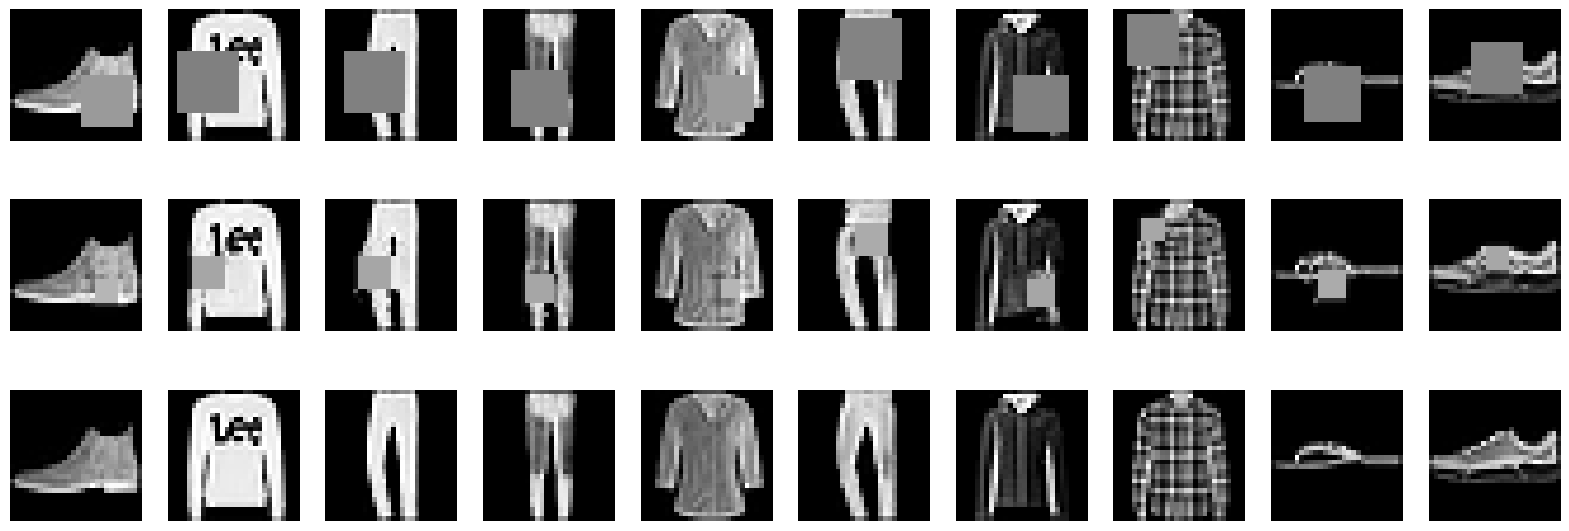

In [108]:
generator_inpaint = GeneratorInpaint()
generator_inpaint.load_state_dict(torch.load("models/saved/inpainting_gan/generator.pth"))
generator_inpaint = generator_inpaint.to(device)

show_gan_test_images(generator_inpaint, test_loader, device)

### Wykorzystanie VAE do inpaintingu

##### Podstawy działania VAE

![AE](./images/AE.webp)
![VAE](./images/VAE.webp)

Źródło: [Rushikesh Shende] (https://medium.com/@rushikesh.shende/autoencoders-variational-autoencoders-vae-and-%CE%B2-vae-ceba9998773d)

Variational Autoencoder (VAE) to rodzaj autoenkodera, który działa na zasadzie probabilistycznego modelowania danych. Jego głównym celem jest generowanie nowych danych podobnych do danych wejściowych, wykorzystując reprezentację informacji w przestrzeni latentnej.

VAE są popularne w zadaniach takich jak generowanie obrazów, kompresja danych i modelowanie złożonych rozkładów prawdopodobieństwa.

##### Struktura VAE
Autoenkoder:

- Enkoder: Mapuje dane wejściowe x na rozkład w przestrzeni latentnej z.
- Dekoder: Odtwarza dane wejściowe x na podstawie próbek z przestrzeni latentnej z.

VAE różni się od standardowego autoenkodera poprzez zastosowanie probabilistycznej interpretacji przestrzeni latentnej:
Zamiast mapowania danych wejściowych na jednopunktową reprezentację z, VAE mapuje je na parametryzowany rozkład, najczęściej rozkład normalny z parametrami $μ$ (średnia) i $σ$ (odchylenie standardowe).

##### Trening VAE
1. Wejście i enkoder:
    - Dane wejściowe x są przetwarzane przez sieć neuronową (enkoder).
    - Enkoder przewiduje parametry rozkładu gaussowskiego dla przestrzeni latentnej:

2. Próbkowanie z przestrzeni latentnej:
    - Na podstawie parametrów $μ$ i $σ$ enkodera, próbkujemy z przestrzeni latentnej z, wykorzystukąjąc technikę reparametryzacji (reparametrization trick).

3. Dekoder i rekonstrukcja:
    - Próbkę z przestrzeni latentnej z przetwarzamy przez dekoder, który odtwarza dane wejściowe x.


##### Funkcja kosztu VAE
Funkcja kosztu VAE składa się z dwóch składników:
- **Rekonstrukcja**: Mierzy błąd między oryginalnymi danymi wejściowymi $x$ a odtworzonymi danymi $x'$.
$$ \mathcal{L}_{\text{recon}} = \mathbb{E}_{q_{\phi}(z|x)} \left[ \log p_{\theta}(x|z) \right] $$
- **Regularyzacja KL**: Mierzy różnicę między rozkładem latentnym $q(z|x)$ a rozkładem prior $p(z)$.

$$ \mathcal{L}_{\text{KL}} = D_{\text{KL}} \left( q_{\phi}(z|x) \,||\, p(z) \right) $$

Funkcja kosztu VAE to suma tych dwóch składników:
$$ \mathcal{L} = \mathcal{L}_{\text{recon}} + \mathcal{L}_{\text{KL}} $$

##### Reparametrization trick
Reparametrization trick to technika, która pozwala na różniczkowanie próbkowania z przestrzeni latentnej, co jest niezbędne do trenowania modelu.

Zamiast bezpośrednio próbować losową zmienną $z$, używamy deterministycznego przekształcenia zmiennej losowej $\epsilon \sim \mathcal{N}(0, 1)$ (standardowy rozkład normalny). 

Przekształcenie wygląda następująco:
$$ z = \mu + \sigma \odot \epsilon, \quad \epsilon \sim \mathcal{N}(0, I) $$

gdzie:
- μ - średnia (przewidziana przez enkoder),
- σ - odchylenie standardowe (przewidziane przez enkoder),
- ϵ∼N(0,I) - losowy szum ze standardowego rozkładu normalnego,
- ⊙ - mnożenie element po elemencie.


Przekształcenie to można traktować jako rozłożenie próbkowania na dwie części:

- Losowość pochodzi od zmiennej ϵ∼N(0,I), która jest niezależna od parametrów modelu.
- Deterministyczne przekształcenie z użyciem $μ$ i $σ$, które są parametrami przewidywanymi przez enkoder, sprawia, że gradienty mogą być propagowane.


In [116]:
def show_vae_test_images(model, dataloader, device):
    model.eval()
    with torch.no_grad():
        for masked_images, images, _ in dataloader:
            images, masked_images = images.to(device), masked_images.to(device)
            fake_images, _, _ = model(masked_images)

            plt.figure(figsize=(20, 7))
            for j in range(10):
                plt.subplot(3, 10, j + 1)
                plt.imshow(masked_images[j].cpu().numpy().transpose(1, 2, 0).squeeze(), cmap='gray')
                plt.axis('off')

                plt.subplot(3, 10, j + 11)
                plt.imshow(fake_images[j].cpu().numpy().transpose(1, 2, 0).squeeze(), cmap='gray')
                plt.axis('off')

                plt.subplot(3, 10, j + 21)
                plt.imshow(images[j].cpu().numpy().transpose(1, 2, 0).squeeze(), cmap='gray')
                plt.axis('off')

            plt.show()

            break

In [90]:
class VAEInpaint(nn.Module):
    def __init__(self, latent_dim=20):
        super(VAEInpaint, self).__init__()
        self.latent_dim = latent_dim

        # Encoder
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(256, latent_dim)
        self.fc_logvar = nn.Linear(256, latent_dim)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28 * 28),
            nn.Tanh()
        )

    def encode(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z).view(-1, 1, 28, 28)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon_x = self.decode(z)
        return recon_x, mu, logvar

In [91]:
def vae_loss_function(recon_x, x, mu, logvar):
    MSE = nn.functional.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return MSE + KLD

In [111]:
def train_inpainting_vae(model, dataloader, optimizer, epochs=10):
    training_progress = tqdm(range(epochs))

    model.train()

    for epoch in training_progress:
        train_loss = 0
        for masked_imgs, original_imgs, _ in dataloader:
            masked_imgs, original_imgs = masked_imgs.to(device), original_imgs.to(device)
            
            optimizer.zero_grad()
            recon_imgs, mu, logvar = model(masked_imgs)
            
            loss = vae_loss_function(recon_imgs, original_imgs, mu, logvar)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()

        save_image(masked_imgs, f"images/inpainted/vae/masked_epoch_{epoch}.png", nrow=8, normalize=True)
        save_image(recon_imgs, f"images/inpainted/vae/recon_epoch_{epoch}.png", nrow=8, normalize=True)
        save_image(original_imgs, f"images/inpainted/vae/original_epoch_{epoch}.png", nrow=8, normalize=True)

        training_progress.set_description(f"Loss: {train_loss / len(dataloader.dataset):.4f}")

    save_image(masked_imgs, f"images/inpainted/vae/masked_final.png", nrow=8, normalize=True)
    save_image(recon_imgs, f"images/inpainted/vae/recon_final.png", nrow=8, normalize=True)
    save_image(original_imgs, f"images/inpainted/vae/original_final.png", nrow=8, normalize=True)

    torch.save(model.state_dict(), "models/saved/inpainting_vae/vae.pth")

    print("Trening zakończony!")

In [93]:
def test_vae(model, test_loader):
    model.eval()
    with torch.no_grad():
        for masked_imgs, original_imgs, masks in test_loader:
            masked_imgs, original_imgs = masked_imgs.to(device), original_imgs.to(device)
            recon_imgs, _, _ = model(masked_imgs)

            n = 8
            plt.figure(figsize=(15, 5))
            for i in range(n):
                # Original
                plt.subplot(3, n, i+1)
                plt.imshow(original_imgs[i].squeeze().cpu(), cmap="gray")
                plt.axis("off")
                if i == 0: plt.title("Original")

                # Masked
                plt.subplot(3, n, i+1+n)
                plt.imshow(masked_imgs[i].squeeze().cpu(), cmap="gray")
                plt.axis("off")
                if i == 0: plt.title("Masked")

                # Reconstructed
                plt.subplot(3, n, i+1+2*n)
                plt.imshow(recon_imgs[i].squeeze().cpu(), cmap="gray")
                plt.axis("off")
                if i == 0: plt.title("Reconstructed")

            plt.show()
            break


In [112]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(MaskedFashionMNIST(train=True), batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(MaskedFashionMNIST(train=False), batch_size=batch_size, shuffle=False)

latent_dim = 20
vae_inpaint = VAEInpaint(latent_dim).to(device)

learning_rate = 1e-3

optimizer = optim.Adam(vae_inpaint.parameters(), lr=learning_rate)

In [ ]:
train_inpainting_vae(vae_inpaint, train_loader, optimizer, epochs=10)

C:\Users\micha\AppData\Local\Temp\ipykernel_36836\659938829.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vae_inpaint.load_state_dict(torch.load("models/saved/inpainti

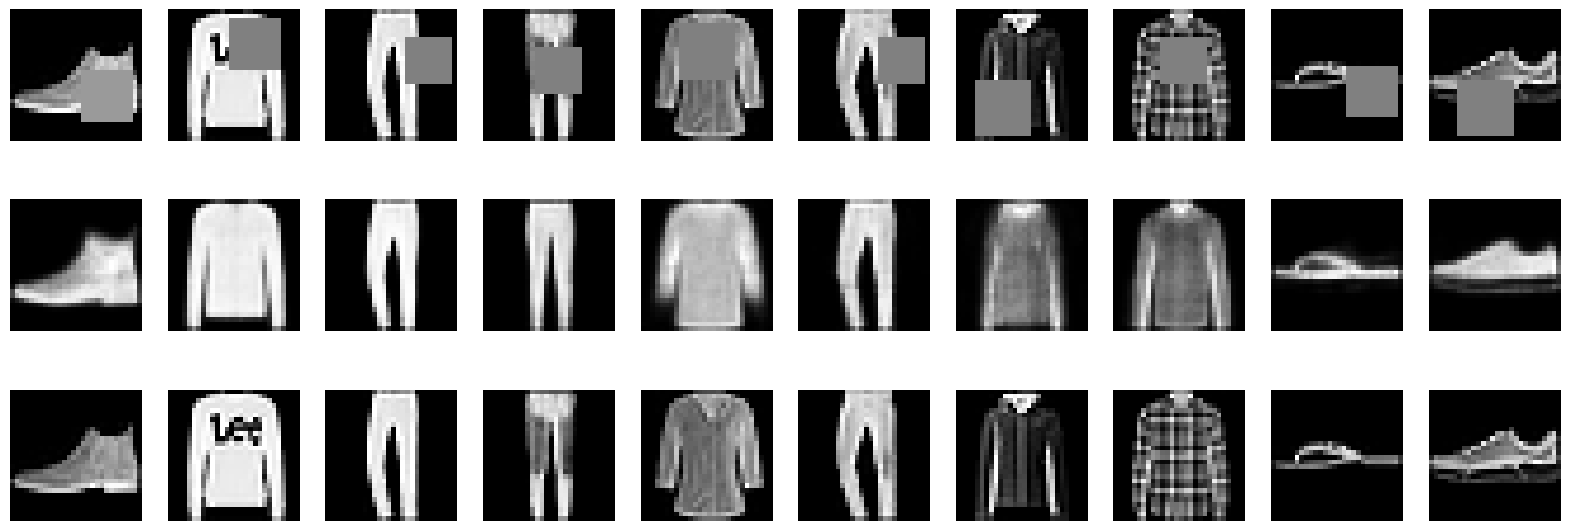

In [117]:
vae_inpaint = VAEInpaint(latent_dim)
vae_inpaint.load_state_dict(torch.load("models/saved/inpainting_vae/vae.pth"))
vae_inpaint = vae_inpaint.to(device)

show_vae_test_images(vae_inpaint, test_loader, device)

## Generowanie obrazów 2D

Do generowania obrazów wykorzystywane są modele analogiczne do tych używanych w inpaintingu, takie jak GAN-y, VAE czy modele dyfuzyjne.

### Wykorzystanie GAN-ów do generowania obrazów 2D

In [11]:
class Generator(nn.Module):
    def __init__(self, z_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)

In [12]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img.view(img.size(0), -1))

In [129]:
def train_gan(generator, optimizer_G, discriminator, optimizer_D, criterion, dataloader, epochs, z_dim, device):
    training_progress = tqdm(range(epochs))

    for epoch in training_progress:
        for real_imgs, _ in dataloader:
            real_imgs = real_imgs.to(device)
            batch_size = real_imgs.size(0)

            real_labels = torch.ones(batch_size, 1).to(device)
            fake_labels = torch.zeros(batch_size, 1).to(device)

            # Trening Dyskryminatora
            z = torch.randn(batch_size, z_dim).to(device)
            fake_imgs = generator(z)
            
            real_loss = criterion(discriminator(real_imgs), real_labels)
            fake_loss = criterion(discriminator(fake_imgs.detach()), fake_labels)
            d_loss = real_loss + fake_loss

            optimizer_D.zero_grad()
            d_loss.backward()
            optimizer_D.step()

            # Trening Generatora
            z = torch.randn(batch_size, z_dim).to(device)
            fake_imgs = generator(z)
            g_loss = criterion(discriminator(fake_imgs), real_labels)

            optimizer_G.zero_grad()
            g_loss.backward()
            optimizer_G.step()

        training_progress.set_description(f"Loss D: {d_loss.item():.4f}, Loss G: {g_loss.item():.4f}")

        z = torch.randn(64, z_dim).to(device)
        fake_imgs = generator(z)

        save_image(fake_imgs, f"images/generated/gan/epoch_{epoch}.png", nrow=8, normalize=True)

    save_image(fake_imgs, f"images/generated/gan/final.png", nrow=8, normalize=True)
    save_model(generator, discriminator, "models/saved/gan")

    print("Trening zakończony!")

In [13]:
batch_size = 128
z_dim = 100
lr = 0.0002
epochs = 50
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataloader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./data', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True
)


In [14]:
generator = Generator(z_dim).to(device)
discriminator = Discriminator().to(device)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

In [131]:
train_gan(generator, optimizer_G, discriminator, optimizer_D, criterion, dataloader, epochs, z_dim, device)

Loss D: 1.3001, Loss G: 0.8038: 100%|██████████| 50/50 [10:26<00:00, 12.53s/it]

Trening zakończony!


In [20]:
def show_gan_test_images(model, dataloader, device, z_dim):
    model.eval()
    with torch.no_grad():
        for images, _ in dataloader:
            images = images.to(device)
            
            z = torch.randn(batch_size, z_dim).to(device)
        
            fake_images = model(z)

            plt.figure(figsize=(20, 5))
            for j in range(10):
                plt.subplot(3, 10, j + 11)
                plt.imshow(fake_images[j].cpu().numpy().transpose(1, 2, 0).squeeze(), cmap='gray')
                plt.axis('off')

                plt.subplot(3, 10, j + 21)
                plt.imshow(images[j].cpu().numpy().transpose(1, 2, 0).squeeze(), cmap='gray')
                plt.axis('off')

            plt.show()

            break

C:\Users\micha\AppData\Local\Temp\ipykernel_27416\3748029470.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator.load_state_dict(torch.load("models/saved/gan/gener

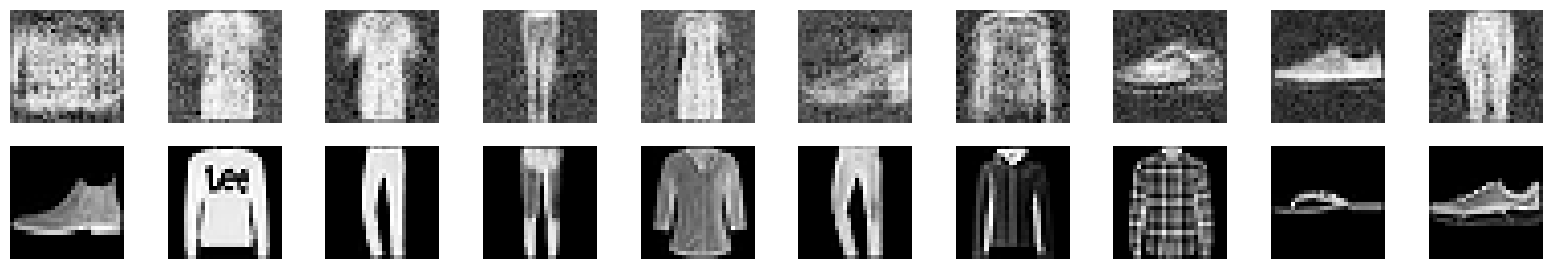

In [27]:
test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./data', train=False, download=True, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=False
)

generator = Generator(z_dim)
generator.load_state_dict(torch.load("models/saved/gan/generator.pth"))
generator = generator.to(device)

show_gan_test_images(generator, test_loader, device, z_dim)

### Zadanie 2. (Opcjonalne): Generowanie obrazów 2D przy użyciu GAN-ów

Twoim zadaniem jest poprawa jakości obrazów generowanych przez powyższy model GAN. Możesz spróbować zmienić architekturę modelu, hiperparametry, funkcje straty lub inne elementy, aby uzyskać lepsze rezultaty.

Szczegóły:
1. Uruchom model GAN do generowania obrazów 2D.
2. Zbadaj jakość generowanych obrazów.
3. Zidentyfikuj potencjalne problemy (np. artefakty, rozmycie, brak detali).
4. Zaproponuj i zaimplementuj zmiany w modelu w celu poprawy jakości generowanych obrazów.
5. Porównaj rezultaty z poprzednimi wynikami.

### Wykorzystanie VAE do generowania obrazów 2D

In [123]:
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim

        # Encoder
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(256, latent_dim)
        self.fc_logvar = nn.Linear(256, latent_dim)

        # Decoder
        self.decoder_input = nn.Linear(latent_dim, 256)
        self.decoder = nn.Sequential(
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28 * 28),
            nn.Sigmoid()
        )

    def encode(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = self.decoder_input(z)
        return self.decoder(h).view(-1, 1, 28, 28)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decode(z)
        return x_recon, mu, logvar

In [124]:
def vae_loss(x, x_recon, mu, logvar):
    recon_loss = nn.functional.binary_cross_entropy(x_recon, x, reduction='sum')
    kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl_div

In [125]:
def train_vae(model, dataloader, optimizer, epochs, device):
    training_progress = tqdm(range(epochs))

    model.train()

    for epoch in training_progress:
        total_loss = 0

        for images, _ in dataloader:
            images = images.to(device)
            recon_images, mu, logvar = model(images)

            loss = vae_loss(images, recon_images, mu, logvar)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        save_image(images, f"images/generated/vae/original_epoch_{epoch}.png", nrow=8, normalize=True)
        save_image(recon_images, f"images/generated/vae/recon_epoch_{epoch}.png", nrow=8, normalize=True)

        training_progress.set_description(f"Loss: {total_loss / len(dataloader.dataset):.4f}")

    save_image(images, f"images/generated/vae/original_final.png", nrow=8, normalize=True)
    save_image(recon_images, f"images/generated/vae/recon_final.png", nrow=8, normalize=True)

    torch.save(model.state_dict(), "models/saved/vae/vae.pth")

    print("Trening zakończony!")

In [126]:
batch_size = 128
latent_dim = 20
num_epochs = 15
learning_rate = 1e-3

dataset = datasets.FashionMNIST(
    root="./data",
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae = VAE(latent_dim).to(device)
optimizer = optim.Adam(vae.parameters(), lr=learning_rate)

In [128]:
train_vae(vae, dataloader, optimizer, num_epochs, device)

Loss: 238.9212: 100%|██████████| 15/15 [02:45<00:00, 11.01s/it]

Trening zakończony!


In [132]:
def show_vae_test_images(model, dataloader, device):
    model.eval()
    with torch.no_grad():
        for images, _ in dataloader:
            images = images.to(device)
            recon_images, _, _ = model(images)

            n = 8
            plt.figure(figsize=(15, 5))
            for i in range(n):
                # Original
                plt.subplot(2, n, i+1)
                plt.imshow(images[i].squeeze().cpu(), cmap="gray")
                plt.axis("off")
                if i == 0: plt.title("Original")

                # Reconstructed
                plt.subplot(2, n, i+1+n)
                plt.imshow(recon_images[i].squeeze().cpu(), cmap="gray")
                plt.axis("off")
                if i == 0: plt.title("Reconstructed")

            plt.show()
            break

C:\Users\micha\AppData\Local\Temp\ipykernel_36836\1720563198.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vae.load_state_dict(torch.load("models/saved/vae/vae.pth"))


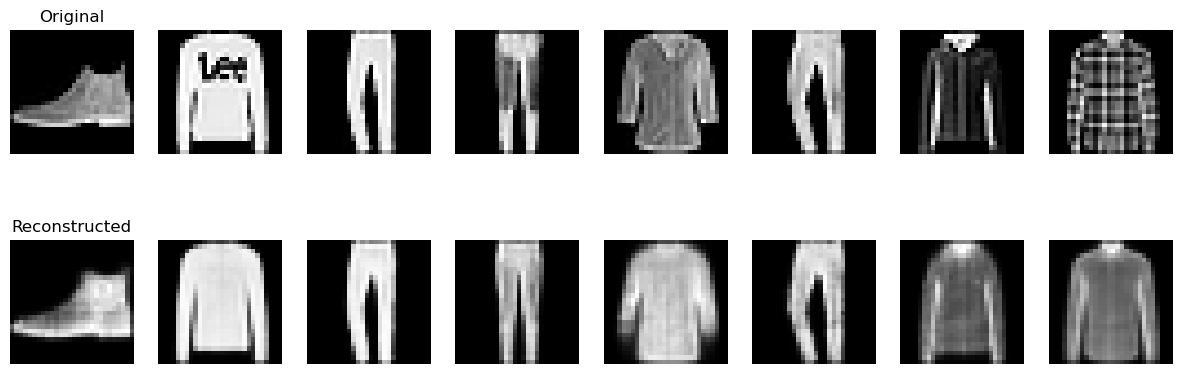

In [133]:
test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./data', train=False, download=True, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=False
)

vae = VAE(latent_dim)
vae.load_state_dict(torch.load("models/saved/vae/vae.pth"))
vae = vae.to(device)

show_vae_test_images(vae, test_loader, device)

### Styl w modelach generatywnych

Rozszerzenia generatywnych modeli poprzez styl polegają na dodaniu mechanizmów pozwalających na kontrolowanie cech wygenerowanych danych, takich jak styl artystyczny, tekstura, kolorystyka czy oświetlenie. Jest to szczególnie istotne w kontekście obrazów, gdzie generowanie treści o określonym stylu jest pożądane w wielu zastosowaniach (sztuka cyfrowa, modyfikacja zdjęć, grafika komputerowa).


#### StyleGAN (Style-based Generative Adversarial Network) (6)

![StyleGAN](./images/style_gan_arch.png)

W tradycyjnych GAN-ach generator bezpośrednio mapuje losowy wektor Z na obraz wyjściowy. StyleGAN wprowadza dwuetapowy proces:

**Mapping Network** - Wektor losowy $Z$ (z przestrzeni latentnej) jest przekształcany na bardziej złożony wektor $W$, który odpowiada za styl.

**Adaptive Instance Normalization (AdaIN)** - Styl $W$ jest następnie wprowadzany do różnych warstw sieci generatora, kontrolując style na różnych poziomach szczegółowości.

##### Architektura StyleGAN
1. **Wektor losowy ($Z$) jako wejście**

    Model zaczyna od losowego wektora $Z$, który jest próbkowany z rozkładu normalnego.

2. **Mapping Network**

    Wektor Z jest przekształcany przez kilka warstw sieci neuronowej w nowy wektor W. Wektor W reprezentuje styl i znajduje się w przestrzeni stylów, która jest bardziej elastyczna niż oryginalna przestrzeń Z.


3. **Stylizacja przez AdaIN**

    Wektor $W$ jest wprowadzany do poszczególnych warstw sieci generatora za pomocą mechanizmu Adaptive Instance Normalization (AdaIN). AdaIN działa w następujący sposób:

    $$ \text{AdaIN}(x, \gamma, \beta) = \gamma \cdot \frac{x - \mu(x)}{\sigma(x)} + \beta
    $$

    gdzie:
    - x to cechy na danej warstwie.
    - μ(x) i σ(x) to średnia i odchylenie standardowe cech.
    - γ i β pochodzą z wektora stylu W.

4. **Generator**

    Generator, zaczynając od niskiej rozdzielczości (np. 4x4), stopniowo zwiększa rozmiar obrazu poprzez przekształcenia splotowe (convolution) oraz wprowadzanie stylów na różnych poziomach szczegółowości.

5. **Dyskryminator**

    Dyskryminator ocenia, czy wygenerowany obraz wygląda realistycznie, odróżniając go od prawdziwych obrazów. Dzięki procesowi uczenia się (rywalizacji generatora z dyskryminatorem) jakość generowanych obrazów wzrasta.


## Literatura
1. [What is Generative AI] (https://www.nvidia.com/en-us/glossary/generative-ai/#:~:text=Generative%20AI%20models%20can%20take,or%20turn%20video%20into%20text.)
2. [Generative Adversarial Networks] (Ian J. Goodfellow, Jean Pouget-Abadie, Mehdi Mirza, Bing Xu, David Warde-Farley, Sherjil Ozair, Aaron Courville, Yoshua Bengio. Generative Adversarial Networks. arXiv:1406.2661)
3. [Variational Autoencoders] (Diederik P. Kingma, Max Welling. Auto-Encoding Variational Bayes. arXiv:1312.6114) 
4. [Variational Autoencoders] (Diederik P. Kingma, Max Welling. An Introduction to Variational Autoencoders. arXiv:1906.02691)
5. [Diffusion Models] (Ling Yang, Zhilong Zhang, Yang Song, Shenda Hong, Runsheng Xu, Yue Zhao, Wentao Zhang, Bin Cui, Ming-Hsuan Yang. Diffusion Models: A Comprehensive Survey of Methods and Applications. arXiv:2209.00796)
6. [StyleGAN] (Tero Karras, Samuli Laine, Timo Aila. A Style-Based Generator Architecture for Generative Adversarial Networks. arXiv:1812.04948)